# Imaging and structure analysis of ferroelectric domains, domain walls, and vortices by scanning electron diffraction - VAE 

Ursula Ludacka<sup>1</sup>, Jiali He<sup>1</sup>, Shuyu Qin<sup>3,4</sup>, Manuel Zahn<sup>1,5</sup>, Emil Frang Christiansen<sup>2</sup>, Kasper A. Hunnestad<sup>1</sup>, Zewu Yan<sup>6,7</sup>, Edith Bourret<sup>7</sup>, István Kézsmárki<sup>5</sup>, Antonius T. J. van Helvoort<sup>2</sup>, Joshua Agar<sup>3,4</sup>, Dennis Meier<sup>1</sup>

Email: dennis.meier@ntnu.no, jca92@drexel.edu

<sup>1</sup> Department of Materials Science and Engineering, NTNU Norwegian University of Science and Technology, Trondheim, Norway \
<sup>2</sup> Department of Physics, NTNU Norwegian University of Science and Technology, Trondheim, Norway\
<sup>3</sup> Department of Materials Science and Engineering, Lehigh University, Bethlehem, USA\
<sup>4</sup> Department of Mechanical Engineering and Mechanics, Drexel University, Philadelphia, USA\
<sup>5</sup> Experimental Physics V, University of Augsburg, Augsburg, Germany\
<sup>6</sup> Department of Physics, ETH Zurich, Zürich, Switzerland.\
<sup>7</sup> Materials Sciences Division, Lawrence Berkeley National Laboratory, Berkeley, USA.


## Abstract

Direct electron detectors in scanning transmission electron microscopy give unprecedented possibilities for structure analysis at the nanoscale. In electronic and quantum materials, this new capability gives access to, for example, emergent chiral structures and symmetry-breaking distortions that underpin functional properties. Quantifying nanoscale structural features with statistical significance, however, is complicated by the subtleties of dynamic diffraction and coexisting contrast mechanisms, which often results in low signal-to-noise and the superposition of multiple signals that are challenging to deconvolute. Here we apply scanning electron diffraction to explore local polar distortions in the uniaxial ferroelectric Er(Mn,Ti)O3. Using a custom-designed convolutional autoencoder with bespoke regularization, we demonstrate that subtle variations in the scattering signatures of ferroelectric domains, domain walls, and vortex textures can readily be disentangled with statistical significance and separated from extrinsic contributions due to, e.g., variations in specimen thickness or bending. The work demonstrates a pathway to quantitatively measure symmetry-breaking distortions across large areas, mapping structural changes at interfaces and topological structures with nanoscale spatial resolution.


## Imports and settings


In [1]:
# !pip install m3-learning


In [16]:
%load_ext autoreload
%autoreload 2

import sys
# if you git-cloned the m3_larning repository, add the location of the src folder to your system path
where_m3_saved = '/home/xinqiao/new_mount/STEM_VAE_for_shuyu'
sys.path.append(f'{where_m3_saved}/m3_learning/m3_learning/src')

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs
import torch

from m3_learning.nn.random import random_seed
from m3_learning.nn.STEM_AE.Viz import Viz
from m3_learning.nn.STEM_AE.STEM_AE import VariationalAutoencoder
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.viz.Movies import make_movie
from m3_learning.nn.STEM_AE.Dataset import STEM_Dataset
from m3_learning.util.file_IO import download_and_unzip

# Specify the filename and the path to save the file
save_path = './../../../STEM_VAE_Data/'
fig_path = save_path.replace("Data", "Figures") + '/'

# builds the printer object
printing = printer(basepath=fig_path,fileformats=['png','svg'],verbose=False)

# Set the style of the plots
set_style("printing")

# Set the random seed for reproducibility
random_seed(seed=42)

%matplotlib inline


printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


In [2]:
# # list of files to download from zenodo
# # uncomment this if you need to download the files from zenodo
# files = [
#     "SED_256x256x12_30x30_alpha3_NBD_spot0p5nm_CL12cm_vortex.hspy"
# ]

# # downloads all the files
# for file in files:
#     # Download the data file from Zenodo
#     url = f"https://zenodo.org/record/7837986/files/{file}?download=1"

#     # download the file
#     download_and_unzip(file, url, save_path)

In [3]:
# # weights to download from zenodo
# # uncomment this if you need to download the files from zenodo
# files = ['Weight_epoch:0000_l1coef:0.0000_lr:0.00003_trainloss:0.7382.pkl',
#  'Weight_epoch:0001_l1coef:0.0000_lr:0.00003_trainloss:0.7314.pkl',
#  'Weight_epoch:0002_l1coef:0.0000_lr:0.00003_trainloss:0.7312.pkl',
#  'Weight_epoch:0003_l1coef:0.0000_lr:0.00003_trainloss:0.7310.pkl',
#  'Weight_epoch:0004_l1coef:0.0000_lr:0.00003_trainloss:0.7308.pkl',
#  'Weight_epoch:0005_l1coef:0.0000_lr:0.00003_trainloss:0.7307.pkl',
#  'Weight_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:0.7307.pkl',
#  'Weight_epoch:0007_l1coef:0.0000_lr:0.00003_trainloss:0.7307.pkl',
#  'Weight_epoch:0008_l1coef:0.0000_lr:0.00003_trainloss:0.7307.pkl',
#  'Weight_epoch:0009_l1coef:0.0000_lr:0.00003_trainloss:0.7308.pkl',
#  'Weight_epoch:0010_l1coef:0.0000_lr:0.00003_trainloss:0.7308.pkl',
#  'Weight_epoch:0011_l1coef:0.0000_lr:0.00003_trainloss:0.7309.pkl',
#  'Weight_epoch:0012_l1coef:0.0000_lr:0.00003_trainloss:0.7309.pkl',
#  'Weight_epoch:0013_l1coef:0.0000_lr:0.00003_trainloss:0.7310.pkl',
#  'Weight_epoch:0014_l1coef:0.0000_lr:0.00003_trainloss:0.7310.pkl',
#  'Weight_epoch:0015_l1coef:0.0000_lr:0.00003_trainloss:0.7311.pkl',
#  'Weight_epoch:0016_l1coef:0.0000_lr:0.00003_trainloss:0.7312.pkl',
#  'Weight_epoch:0017_l1coef:0.0000_lr:0.00003_trainloss:0.7312.pkl',
#  'Weight_epoch:0018_l1coef:0.0000_lr:0.00003_trainloss:0.7313.pkl',
#  'Weight_epoch:0019_l1coef:0.0000_lr:0.00003_trainloss:0.7313.pkl',
#  'Weight_epoch:0020_l1coef:0.0000_lr:0.00003_trainloss:0.7313.pkl',
#  'Weight_epoch:0021_l1coef:0.0000_lr:0.00003_trainloss:0.7314.pkl',
#  'Weight_epoch:0022_l1coef:0.0000_lr:0.00003_trainloss:0.7314.pkl',
#  'Weight_epoch:0023_l1coef:0.0000_lr:0.00003_trainloss:0.7315.pkl',
#  'Weight_epoch:0024_l1coef:0.0000_lr:0.00003_trainloss:0.7315.pkl',
#  'Weight_epoch:0025_l1coef:0.0000_lr:0.00003_trainloss:0.7316.pkl',
#  'Weight_epoch:0026_l1coef:0.0000_lr:0.00003_trainloss:0.7316.pkl',
#  'Weight_epoch:0027_l1coef:0.0000_lr:0.00003_trainloss:0.7317.pkl']

# # downloads all the files
# for file in files:
#     # Download the data file from Zenodo
#     url = f"https://zenodo.org/record/10092102/files/{file}?download=1"

#     # download the file
#     download_and_unzip(file, url, save_path)
# # url = f"https://zenodo.org/api/records/10092102/files-archive"

# # # download the file
# # download_and_unzip(file, url, save_path+'downloaded_weights/')

## Vortex Domains

### Loads the Dataset


In [4]:
# loads the dataset
# this object will also compute the log of the dataset
# this is available as self.log_data
vortex = STEM_Dataset(
    data_path=f"{save_path}/SED_256x256x12_30x30_alpha3_NBD_spot0p5nm_CL12cm_vortex.hspy"
)

/home/xinqiao/anaconda3/envs/m3/lib/python3.11/site-packages/hyperspy/misc/utils.py:471: VisibleDeprecationWarning: Use of the `binned` attribute in metadata is going to be deprecated in v2.0. Set the `axis.is_binned` attribute instead. 
  warnings.warn(
/home/xinqiao/anaconda3/envs/m3/lib/python3.11/site-packages/hyperspy/io.py:572: VisibleDeprecationWarning: Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
  warnings.warn('Loading old file version. The binned attribute '


### Instantiates the Visualizer


In [5]:
# instantiates the visualization class
viz = Viz(printer=printing, labelfigs_=True)
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm", "channel": -1}

### Visualizes the Raw Data

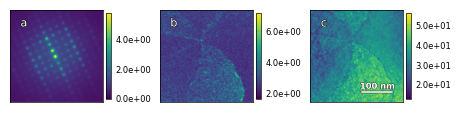

In [29]:
bright_field_ = (150, 162, 152, 165)
dark_field_ = (106, 123, 110, 125)
filename = "STEM_raw_and_virtual_vortex_domains"
viz.scalebar_ = {"width": 291, "scale length": 100, "units": "nm"}
viz.STEM_raw_and_virtual(
    vortex,
    bright_field_=bright_field_,
    dark_field_=dark_field_,
    scalebar_=True,
    filename=filename,
    shape_=vortex.data.shape,
)

### Builds the Neural Network Model


In [7]:
encoder_step_size = [256, 256]
pooling_list = [4, 4, 2]
decoder_step_size = [8, 8]
upsampling_list = [2, 4, 4]
embedding_size = 32
conv_size = 128
checkpoints_folder = 'downloaded_weights'


# set device to load model
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"

model = VariationalAutoencoder(
    encoder_step_size=encoder_step_size,
    pooling_list=pooling_list,
    decoder_step_size=decoder_step_size,
    upsampling_list=upsampling_list,
    embedding_size=embedding_size,
    conv_size=conv_size,
    device=device,
    learning_rate=3e-5,
)


### Trains or Loads Pretrained Weights


In this model we generate a mean and standard deviation in the embedding to generate a normal distribution. The samples values pass through the decoder. Introducing this distribution should theoretically allow the model to be more robust with noise. 

Additionally, we calculate the KL-divergence divergence of the embedding distributions scale it with a $\beta$ term to add to the loss function, shown below. This should
$$
\mathbf{kl\_loss} = \beta \sum_{i=0}^{n} \frac{\sigma_i - \mu_i^2 - e^{\sigma_i}+ 1}{2n}
$$

In [31]:
# set retrain parameter
# manually change beta if you incremented it
train = False
if train:
    model.Train(
        vortex.log_data,
        epochs=1,
        with_scheduler=False,
        folder_path=f'{save_path}/{checkpoints_folder}',
        batch_size=16,
        beta=0,
        beta_schedule=[5e-4,1]
    )

else:
    model.load_weights(
        f'{save_path}/{checkpoints_folder}/Weight_epoch:0027_l1coef:0.0000_lr:0.00003_trainloss:0.7317.pkl'
        )

100%|██████████| 4096/4096 [36:27<00:00,  1.87it/s]


Epoch: 000/001 | Train Loss: 0.7382
.............................


In [10]:
embedding = model.get_embedding(vortex.log_data,batch_size=16)


100%|██████████| 4096/4096 [05:44<00:00, 11.89it/s]


### Computes embeddings for all checkpoints in a folder, and writes to h5 file in the folder

In [ ]:
model.write_multi_embeddings(input_folder = checkpoints_folder,
                            output_folder = checkpoints_folder,
                            input_data = vortex.log_data,
                            output_filename = 'embeddings.h5',
                            batch_size=16,
                            overwrite=True)

Weight_epoch:0000_l1coef:0.0000_lr:0.00003_trainloss:0.7382


100%|██████████| 2048/2048 [05:47<00:00,  5.89it/s]


Weight_epoch:0001_l1coef:0.0000_lr:0.00003_trainloss:0.7314


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0002_l1coef:0.0000_lr:0.00003_trainloss:0.7312


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0003_l1coef:0.0000_lr:0.00003_trainloss:0.7310


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0004_l1coef:0.0000_lr:0.00003_trainloss:0.7308


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0005_l1coef:0.0000_lr:0.00003_trainloss:0.7307


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:0.7307


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0007_l1coef:0.0000_lr:0.00003_trainloss:0.7307


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0008_l1coef:0.0000_lr:0.00003_trainloss:0.7307


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0009_l1coef:0.0000_lr:0.00003_trainloss:0.7308


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0010_l1coef:0.0000_lr:0.00003_trainloss:0.7308


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0011_l1coef:0.0000_lr:0.00003_trainloss:0.7309


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0012_l1coef:0.0000_lr:0.00003_trainloss:0.7309


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0013_l1coef:0.0000_lr:0.00003_trainloss:0.7310


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0014_l1coef:0.0000_lr:0.00003_trainloss:0.7310


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0015_l1coef:0.0000_lr:0.00003_trainloss:0.7311


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0016_l1coef:0.0000_lr:0.00003_trainloss:0.7312


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0017_l1coef:0.0000_lr:0.00003_trainloss:0.7312


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0018_l1coef:0.0000_lr:0.00003_trainloss:0.7313


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0019_l1coef:0.0000_lr:0.00003_trainloss:0.7313


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0020_l1coef:0.0000_lr:0.00003_trainloss:0.7313


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0021_l1coef:0.0000_lr:0.00003_trainloss:0.7314


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0022_l1coef:0.0000_lr:0.00003_trainloss:0.7314


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0023_l1coef:0.0000_lr:0.00003_trainloss:0.7315


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0024_l1coef:0.0000_lr:0.00003_trainloss:0.7315


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0025_l1coef:0.0000_lr:0.00003_trainloss:0.7316


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0026_l1coef:0.0000_lr:0.00003_trainloss:0.7316


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0027_l1coef:0.0000_lr:0.00003_trainloss:0.7317


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


### Visualizes current model Embedding

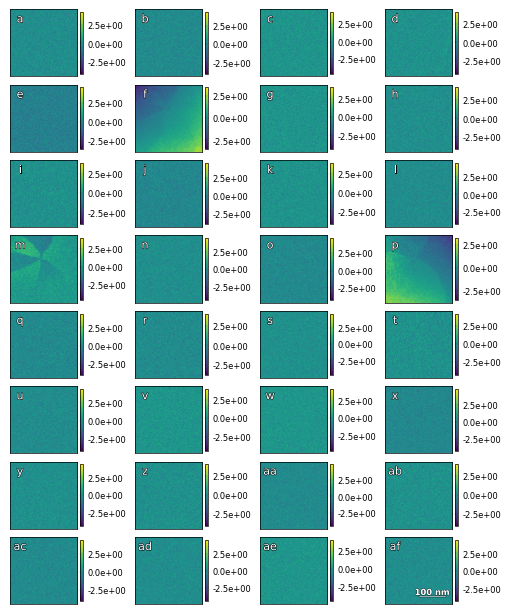

In [11]:
viz.channels = None
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm"}
viz.model = model
viz.embeddings(
    mod=4,
    scalebar_=viz.scalebar_,
    name="vortex_VAE_1",
    shape_=vortex.data.shape,
    figsize=(5, 8),
)



### Visualize all embeddings in embedding h5 file

In [24]:
viz.model = model
viz.channels = None
viz.scalebar_ = {"width": 291, "scale length": 100, "units": "nm"}
viz.multi_embeddings(
    h5_filename = f'{save_path}/{checkpoints_folder}/embeddings.h5',
    mod=4,
    scalebar_=viz.scalebar_,
    figsize=(5, 8),
    shape_=vortex.data.shape,
    output_folder='VAE_embeddings_by_beta'
)

100%|██████████| 28/28 [09:09<00:00, 19.63s/it]


### Creates embedding movies through beta schueduling

In [35]:
# Builds a Movie
folder = f"{fig_path}/VAE_embeddings_by_beta/"
output_folder = "./movies_by_beta/"

# function to make the movie
make_movie('VAE_embeddings_by_beta',
           folder, "./movies/",
           'png', 3, text_list=True)

  0%|          | 0/28 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:11<00:00,  2.53it/s]


### Generates diffraction pattern from all Zeros, through beta scheduling

In [30]:
viz.multi_generate_from_zero(input_folder = f'{save_path}/{checkpoints_folder}')

100%|██████████| 27/27 [00:23<00:00,  1.13it/s]


In [38]:
# Builds a Movie
folder = f"{fig_path}/generated0/"
output_folder = f"{fig_path}/movies/"

# function to make the movie
make_movie("Vortex Domains Generated from 0_1", folder, output_folder, "png", 3, 
           text_list=True)

100%|██████████| 29/29 [00:01<00:00, 22.30it/s]


### Generates Data from the Latent Space

In [32]:
viz.model = model
viz.channels = list(np.arange(32))

# Make sure to load the correct checkpoint before generating images 
model.load_weights(
    f'{save_path}/{checkpoints_folder}/Weight_epoch:0027_l1coef:0.0000_lr:0.00003_trainloss:0.7317.pkl'
    )

viz.generator_images(
    folder_name='vortex_VAE_by_beta',
    figsize=(8,4),
    graph_layout=[32,8],
    cbar_number_format="%d",
    shape_=vortex.data.shape,
    divider_=False,
    generator_iters=100
)

100%|██████████| 100/100 [36:41<00:00, 22.01s/it]


### Builds the Movie

In [34]:
# Builds a Movie
folder = f"{fig_path}/generator_images_vortex_VAE_by_beta/"
output_folder = f"{fig_path}/movies/"

# function to make the movie
make_movie("Vortex Domains Generator_1", folder, output_folder, "png", 3, text_list=True)

100%|██████████| 100/100 [00:18<00:00,  5.38it/s]
